## Recommendation System using the Content-Based recommender


### Netflix-  TV Shows and Movies

### This data set was created to list all shows available on Netflix streaming. This data was acquired in May 2022 containing data available in the United States.

### This dataset has two files containing the titles (titles.csv) and the cast (credits.csv) for the title.

### This dataset contains +5k unique titles on Netflix with 15 columns containing their information, including:


* id: The title ID on JustWatch.
* title: The name of the title.
* show_type: TV show or movie.
* description: A brief description.
* release_year: The release year.
* age_certification: The age certification.
* runtime: The length of the episode (SHOW) or movie.
* genres: A list of genres.
* production_countries: A list of countries that produced the title.
* seasons: Number of seasons if it's a SHOW.
* imdb_id: The title ID on IMDB.
* imdb_score: Score on IMDB.
* imdb_votes: Votes on IMDB.
* tmdb_popularity: Popularity on TMDB.
* tmdb_score: Score on TMDB.


### And over +77k credits of actors and directors on Netflix titles with 5 columns containing their information, including:

* person_ID: The person ID on JustWatch.
* id: The title ID on JustWatch.
* name: The actor or director's name.
* character_name: The character name.
* role: ACTOR or DIRECTOR.

IMPORT LIBRARIES

In [3]:
import pandas as pd
import numpy as np

print("Import Successful!")


Import Successful!


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print("Import Successful!")


Import Successful!


### Import the data set

In [48]:
Movies = pd.read_csv('/titles.csv')

In [49]:
Movies.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


## Descriptive Analysis and Data visualization

### In this section

* we describe the dataset feature and explore their characteristics
* we clean the dateset
* visualize the dataset
* we prepare it for our recommendation model


In [85]:
Movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [261]:
Movies.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [86]:
Movies.shape

(5806, 15)

In [14]:
pd.DataFrame(Movies.isna().sum())

#there are too many null in age certification and seasons
#will replace with unknown and will check them out

,0
id,0
title,1
type,0
description,18
release_year,0
age_certification,2610
runtime,0
genres,0
production_countries,0
seasons,3759


In [7]:
Movies['type'].value_counts()

MOVIE    3759
SHOW     2047
Name: type, dtype: int64

In [50]:
Movies['genres'].value_counts()

#there 1626 different level for genres of netflix productions


['comedy']                                            510
['drama']                                             350
['documentation']                                     320
['comedy', 'drama']                                   141
['drama', 'comedy']                                   128
                                                     ... 
['drama', 'family', 'comedy', 'music']                  1
['drama', 'thriller', 'western']                        1
['comedy', 'thriller', 'drama', 'action', 'crime']      1
['romance', 'drama', 'history', 'european']             1
['family', 'comedy', 'animation']                       1
Name: genres, Length: 1626, dtype: int64

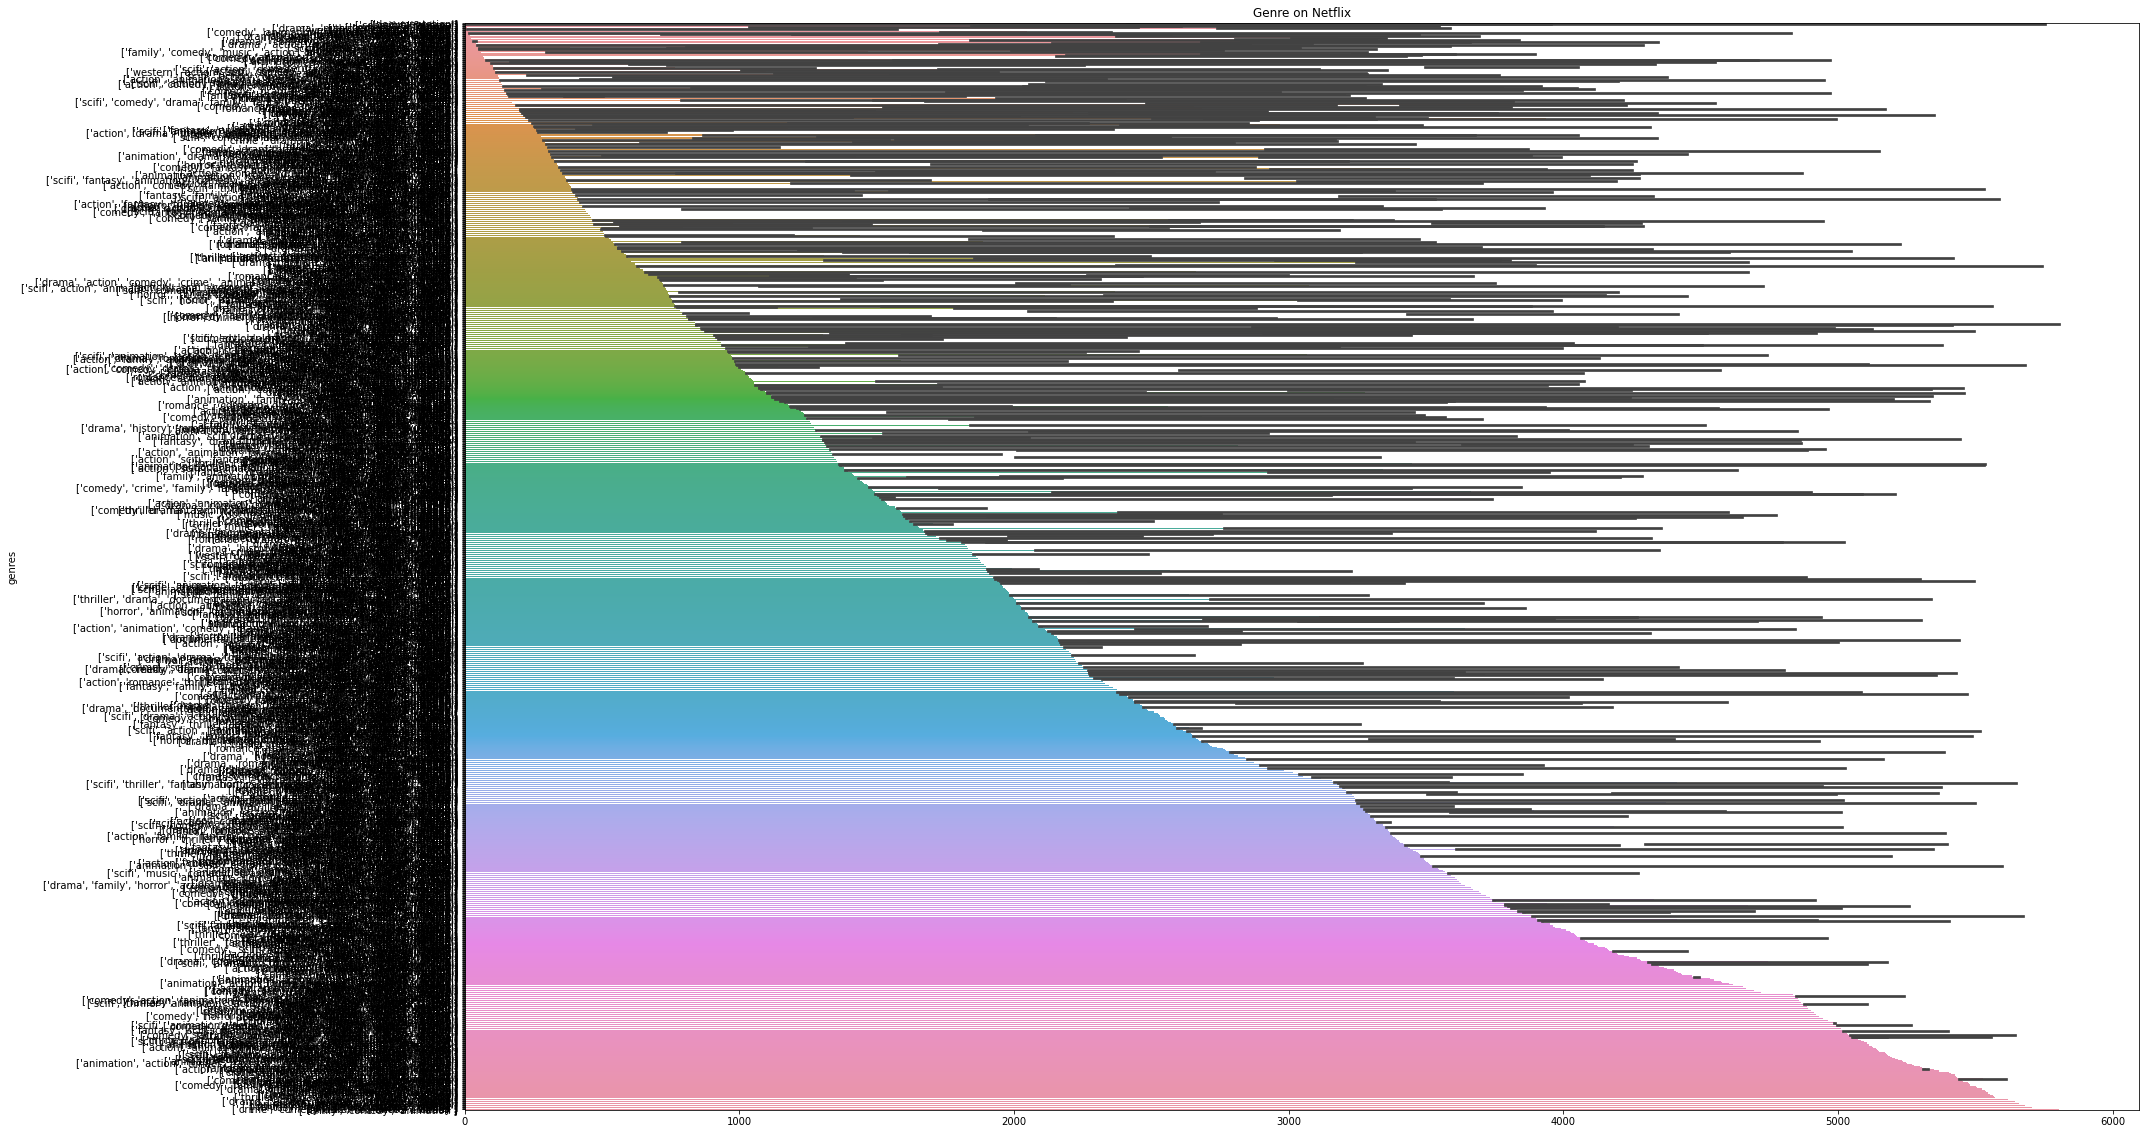

In [92]:
plt.figure(figsize=(30,20))

plt.title('Genre on Netflix')
sns.barplot(y=Movies['genres'], x=Movies.index)
plt.show()


In [51]:
# also find all unique genres

array = Movies['genres'].to_list()

array01 = [s.strip("[]") for s in array]
lst = []

for i in range(len(array01)):
    lst.append(array01[i].split(','))
    result = list({x for l in lst for x in l})
    result01 = [s.strip("' ") for s in result]


def unique_genres(list1):
    list_set = set(list1)
    unique_genres_list =(list(list_set))
    for x in unique_genres_list:
        print(x)
        


res = unique_genres(result01)







romance
european
fantasy
animation
horror
music
scifi
thriller
documentation
reality
western
sport
crime
family
action
war
history
drama
comedy


In [52]:
# also find all unique countries


array = Movies['production_countries'].to_list()


array01 = [s.strip("[]") for s in array]
lst = []

for i in range(len(array01)):
    lst.append(array01[i].split(','))
    result = list({x for l in lst for x in l})
    result01 = [s.strip("' ") for s in result]


def unique_genres(list1):
    list_set = set(list1)
    unique_genres_list =(list(list_set))
    for x in unique_genres_list:
        print(x)
        


res = unique_genres(result01)


MZ
ZW
CD
NP
AU
SE
LK
IE
DE
MY
IL
KE
UY
QA
ID
BS
RS
ES
CY
GR
CU
GH
EG
IS
MA
IQ
LU
NO
BF
VN
NZ
PT
GT
KG
UA
IN
HR
TR
AE
Lebanon
LT
VA
SN
LB
SK
IT
IR
TH
MX
CN
BR
JO
AO
HK
BE
BD
SA
XX
MW
PS
CA
AT
KW
PK
GL
HU
SG
AR
CM
GB
BY
US
SU
TN
AF
CO
RO
IO
GE
PE
CH
NG
CL
PR
NL
MU
DZ
FO
FI
JP
PY
ZA
VE
TW
TZ
BG
SY
KR
NA
AL
DK
FR
RU
KH
PH
CZ
PL


In [53]:
Movies['genres'] = Movies['genres'].str.replace(r'[\'\[\]]', '', regex=True)

Movies['genres'] = Movies['genres'].str.title()

Movies['production_countries'] = Movies['production_countries'].str.replace(r'[\'\[\]]', '', regex=True)

Movies['production_countries'] = Movies['production_countries'].str.title()

Movies.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,Documentation,Us,1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"Crime, Drama",Us,NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"Comedy, Fantasy",Gb,NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,Comedy,Gb,NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,Horror,Us,NaN,tt0070047,8.1,391942.0,95.337,7.7


In [25]:
Movies['genres'].value_counts().head(15)

Comedy                    510
Drama                     350
Documentation             320
Comedy, Drama             141
Drama, Comedy             128
Reality                   120
Drama, Romance            112
Comedy, Documentation      93
Animation                  69
                           68
Comedy, Romance            63
Comedy, Drama, Romance     60
Crime, Documentation       56
Romance, Drama             55
Drama, Comedy, Romance     54
Name: genres, dtype: int64

In [54]:
# remove the genres wiht no input

Movies =Movies[Movies['genres'] != '']


In [30]:
pd.DataFrame(Movies['production_countries'].value_counts().head(10))

#regroup into these 10 production countries


,production_countries
Us,1931
In,604
Jp,264
Gb,217
Kr,207
,205
Es,159
Fr,124
Ca,100
Mx,95


In [55]:
# remove the production countries wiht no input

Movies =Movies[Movies['production_countries'] != '']
pd.DataFrame(Movies['production_countries'].value_counts().head(10))


,production_countries
Us,1931
In,604
Jp,264
Gb,217
Kr,207
Es,159
Fr,124
Ca,100
Mx,95
Br,86


In [56]:
a = Movies['runtime'].mean()
b = max(Movies.runtime)
c =min(Movies.runtime)

print('The mean duration for a an episode is {} minutes, the maximum is {}, and the minimum is {}'.format(a,b,c))

The mean duration for a an episode is 78.74516537140792 minutes, the maximum is 251, and the minimum is 0


In [57]:
#removing the 19 productions with no invalid runtime


Movies[Movies['runtime'] == 0].count()




id                      19
title                   19
type                    19
description             19
release_year            19
age_certification       15
runtime                 19
genres                  19
production_countries    19
seasons                 19
imdb_id                 17
imdb_score              15
imdb_votes              15
tmdb_popularity         17
tmdb_score              14
dtype: int64

In [58]:
Movies = Movies[Movies['runtime'] != 0]
Movies[Movies['runtime'] == 0].count()


id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [59]:

you_can_go =['imdb_id']

Movies.drop( you_can_go , axis =1, inplace= True)


In [60]:
pd.DataFrame(Movies.isnull().sum())


,0
id,0
title,0
type,0
description,7
release_year,0
age_certification,2433
runtime,0
genres,0
production_countries,0
seasons,3588


In [61]:
pd.DataFrame(Movies['age_certification'].value_counts())

#there are 11 age_certification
#there are 2433 NaN

### Handling missing data

In [63]:
Movies['age_certification'].fillna('not rate', inplace = True)
Movies['seasons'].fillna(0, inplace = True)
Movies['imdb_score'].fillna(0, inplace = True)
Movies['imdb_votes'].fillna(0, inplace = True)
Movies['tmdb_popularity'].fillna(0, inplace = True)
Movies['tmdb_score'].fillna(0, inplace = True)



In [64]:
pd.DataFrame(Movies.isnull().sum())


,0
id,0
title,0
type,0
description,7
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
seasons,0


In [66]:
Movies[Movies['description'].isna()]
#seven movies with no descriptions ,three with no age certification and zero seasons
#we remove them


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2310,ts82770,Camarón Revolution,SHOW,NaN,2018,TV-14,52,Reality,Es,1.0,0.0,0.0,1.673,7.0
2480,ts82375,Beyblade Burst Turbo,SHOW,NaN,2018,TV-Y7,24,"Action, Scifi",Jp,1.0,0.0,0.0,0.600,0.5
2727,ts90941,"Heidi, bienvenida a casa",SHOW,NaN,2017,TV-Y,46,"Comedy, Family",Ar,1.0,6.2,20.0,4.135,8.8
2888,tm407349,The Birth Reborn 2,MOVIE,NaN,2018,PG,91,Documentation,Br,0.0,6.6,5.0,0.738,5.8
4705,tm840152,Amsterdam to Anatolia,MOVIE,NaN,2019,not rate,6,Thriller,"Nl, Ps, Us, Lb",0.0,0.0,0.0,0.731,6.0
4752,tm896976,True: Rainbow Rescue,MOVIE,NaN,2020,not rate,23,Animation,Us,0.0,0.0,0.0,3.517,10.0
4806,tm902993,Mama Drama,MOVIE,NaN,2020,not rate,85,Drama,Us,0.0,6.3,8.0,0.000,0.0


In [76]:
Movies.dropna(inplace=True)

Movies.shape

(5507, 14)

In [77]:
Movies['age_certification'].value_counts()

not rate    2430
TV-MA        815
R            569
TV-14        451
PG-13        436
PG           243
TV-PG        169
G            117
TV-Y7        104
TV-Y          86
TV-G          73
NC-17         14
Name: age_certification, dtype: int64

### Univarate analysis

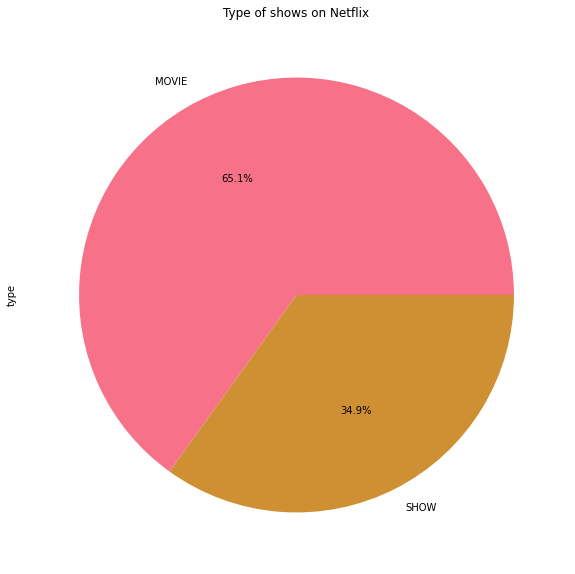

In [78]:
plt.title('Type of shows on Netflix')
colors = sns.color_palette("husl", 8)
Movies['type'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(15,10),colors=colors)
plt.show()

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        4.000e+00, 2.000e+00, 5.000e+00, 1.000e+00, 1.200e+01, 4.000e+00,
        1.100e+01, 7.000e+00, 6.000e+00, 1.300e+01, 1.000e+01, 2.100e+01,
        4.000e+00, 3.300e+01, 1.200e+01, 2.300e+01, 2.500e+01, 2.600e+01,
        2.300e+01, 5.100e+01, 6.700e+01, 5.100e+01, 1.150e+02, 6.300e+01,
        1.730e+02, 1.090e+02, 2.950e+02, 2.320e+02, 9.340e+02, 7.400e+02,
        1.529e+03, 8.850e+02]),
 array([1945.  , 1946.54, 1948.08, 1949.62, 1951.16, 1952.7 , 1954.24,
        1955.78, 1957.32, 1958.86, 1960.4 , 1961.94, 1963.48, 1965.02,
        1966.56, 1968.1 , 1969.64, 1971.18, 1972.72, 1974.26, 1975.8 ,
        1977.34, 1978.88, 1980.42, 1981.96, 1983.5 , 1985.04, 1986.58,
        1988.12, 1989.66, 1991.2 , 1992.74, 1994.28, 1995.82, 1997.36,
        1998.9 , 2000

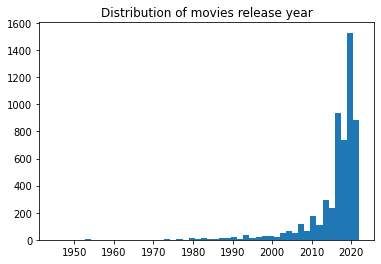

In [80]:
plt.title('Distribution of movies release year')
plt.hist(Movies['release_year'], bins = 50)

(array([4.795e+03, 3.920e+02, 1.230e+02, 7.500e+01, 3.300e+01, 1.400e+01,
        1.300e+01, 1.400e+01, 9.000e+00, 8.000e+00, 4.000e+00, 3.000e+00,
        3.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   0.     ,   36.46748,   72.93496,  109.40244,  145.86992,
         182.3374 ,  218.80488,  255.27236,  291.73984,  328.20732,
         364.6748 ,  401.14228,  437.60976,  474.07724,  510.54472,
         547.0122 ,  583.47968,  619.94716,  656.41464,  692.88212,
         729.3496 ,  765.81708,  802.28456,  838.75204,  875.21952,
         911.687  ,  948.15448,  984

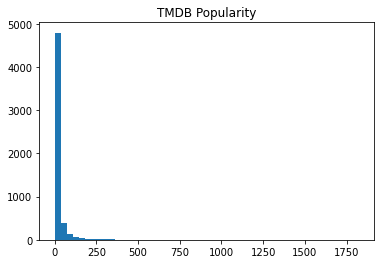

In [81]:
plt.title('TMDB Popularity')
plt.hist(Movies['tmdb_popularity'], bins=50)


(array([ 28.,  50.,  75.,  94., 398., 218.,  98., 132., 389., 243., 157.,
        207., 153., 120., 105., 101., 194., 341., 408., 352., 324., 247.,
        200., 161., 139., 119.,  96.,  82.,  50.,  50.,  36.,  36.,  29.,
         22.,  14.,  10.,   7.,   3.,   4.,   1.,   1.,   3.,   1.,   1.,
          3.,   2.,   1.,   1.,   0.,   1.]),
 array([  2.  ,   6.98,  11.96,  16.94,  21.92,  26.9 ,  31.88,  36.86,
         41.84,  46.82,  51.8 ,  56.78,  61.76,  66.74,  71.72,  76.7 ,
         81.68,  86.66,  91.64,  96.62, 101.6 , 106.58, 111.56, 116.54,
        121.52, 126.5 , 131.48, 136.46, 141.44, 146.42, 151.4 , 156.38,
        161.36, 166.34, 171.32, 176.3 , 181.28, 186.26, 191.24, 196.22,
        201.2 , 206.18, 211.16, 216.14, 221.12, 226.1 , 231.08, 236.06,
        241.04, 246.02, 251.  ]),
 <BarContainer object of 50 artists>)

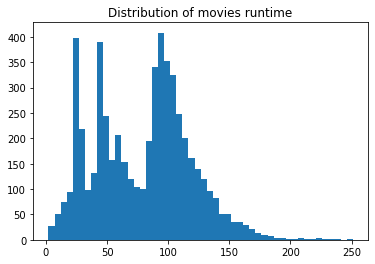

In [82]:
plt.title('Distribution of movies runtime')
plt.hist(Movies['runtime'], bins = 50)

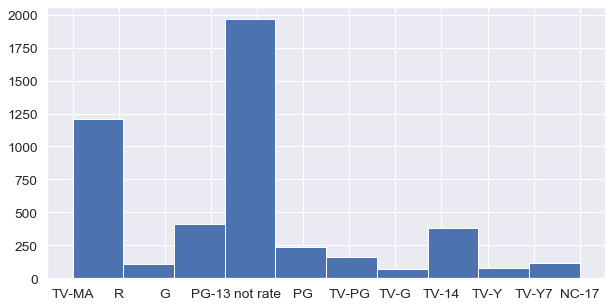

In [79]:
Movies['age_certification'].hist(figsize = (10,5))

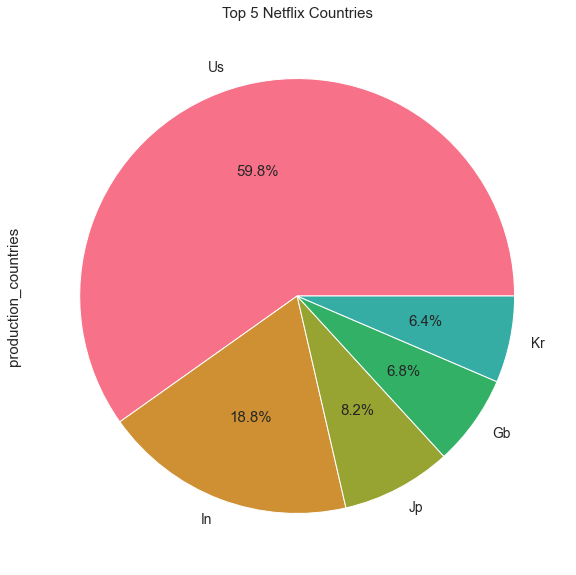

In [72]:

plt.figure(figsize=(15, 10))
plt.title('Top 5 Netflix Countries')
colors = sns.color_palette("husl", 8)
Movies["production_countries"].value_counts().nlargest(n=5).plot.pie(
    autopct='%1.1f%%', figsize=(15, 10), colors=colors)
plt.show()


In [254]:
Movies.corr()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.211139,-0.123035,-0.097154,-0.206233,0.013403,0.042197
runtime,-0.211139,1.000000,-0.434807,0.008105,0.142510,-0.048511,-0.186497
seasons,-0.123035,-0.434807,1.000000,0.159289,0.060246,0.287430,0.189707
imdb_score,-0.097154,0.008105,0.159289,1.000000,0.175716,0.072153,0.299775
imdb_votes,-0.206233,0.142510,0.060246,0.175716,1.000000,0.237495,0.109175
tmdb_popularity,0.013403,-0.048511,0.287430,0.072153,0.237495,1.000000,0.112505
tmdb_score,0.042197,-0.186497,0.189707,0.299775,0.109175,0.112505,1.000000


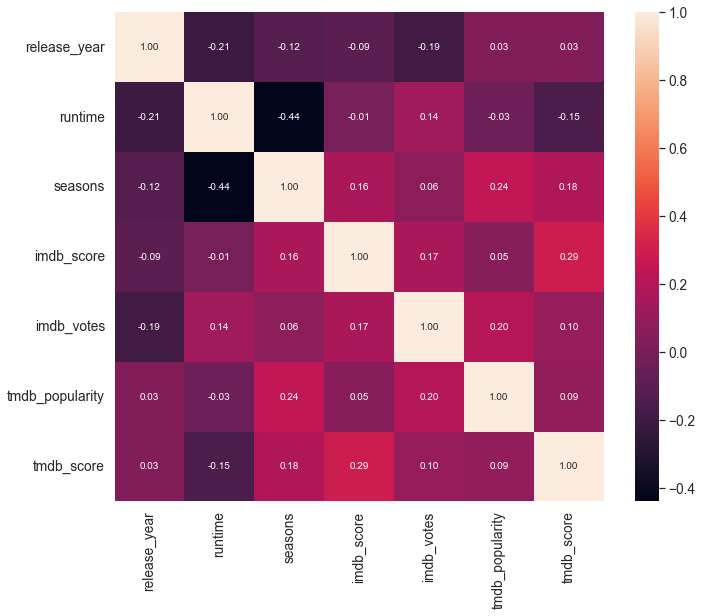

In [50]:
movie_corr =Movies.corr()

sns.set(font_scale=1.25)

fig, ax = plt.subplots(figsize =(11,9))

hm_movies = sns.heatmap(movie_corr, cbar =True, annot= True, square = True, fmt=".2f", annot_kws ={"size":10,}, yticklabels=movie_corr.index, xticklabels= movie_corr.index)



### Conclusions

* Release year doesnt affect popularity or score, likewise runtime
* There is a high correlation between imdb score and tmdb score, seem they both have something together
* Seasons has small correlation with tmdb pupolarity, high popularuty should infer more seasons than on imdb votes
* Seasons reduced averagely over the year. this tells movies with lesser seasons
* Imdb vote has  low correlation with the seasons and popularity


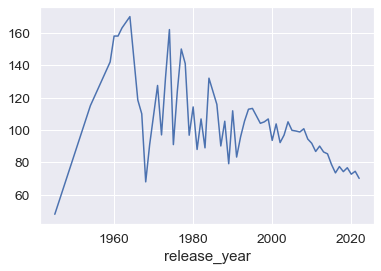

In [90]:
Movies.groupby(by ='release_year').mean()['runtime'].plot()

Import Credit dataset

In [84]:
credits = pd.read_csv('/credits.csv')
credits['role'].value_counts()

ACTOR       72690
DIRECTOR     4523
Name: role, dtype: int64

In [85]:
id_uniques = credits['id'].unique()
ids = credits['id']
roles = credits['role']
names = credits['name']

# List save actors and directors
actors = []
directors = []

start = 0

for id_unique in id_uniques:
    act = []
    dir = []
    for i in range(start, len(ids)):
        if (ids[i] == id_unique):
            if roles[i] == "ACTOR":
                act.append(names[i])
            elif roles[i] == "DIRECTOR":
                dir.append(names[i])
        else:
            start = i
            break
    actors.append(act)
    directors.append(dir)

In [86]:
credits_new = {'id': id_uniques, 'actors': actors, 'directors': directors}
credits_new =pd.DataFrame(data = credits_new)
credits_new

,id,actors,directors
0,tm84618,"[Robert De Niro, Jodie Foster, Albert Brooks, ...",[Martin Scorsese]
1,tm127384,"[Graham Chapman, John Cleese, Eric Idle, Terry...","[Terry Jones, Terry Gilliam]"
2,tm70993,"[Graham Chapman, John Cleese, Terry Gilliam, E...",[Terry Jones]
3,tm190788,"[Ellen Burstyn, Linda Blair, Max von Sydow, Le...",[William Friedkin]
4,ts22164,"[Graham Chapman, Michael Palin, Terry Jones, E...",[]
...,...,...,...
5429,tm1040816,"[Jolina Magdangal, Melai Cantiveros, Karla Est...",[Easy Ferrer]
5430,tm1014599,"[Richard Mofe-Damijo, Ego Nwosu, Keppy Ekpenyo...",[Seyi Babatope]
5431,tm1108171,[Edis Görgülü],[Kürşad Bayhan]
5432,tm1045018,"[Omoni Oboli, Stephanie Okereke-Linus, Merlisa...",[Pascal Atuma]


In [101]:
Movies_credits = Movies.merge(credits_new,how='inner', on= 'id')
Movies_credits.shape

(5246, 16)

In [105]:
Movies_credits.isna().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
actors                  0
directors               0
dtype: int64

In [129]:
Movies_credits.head(1)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actors,directors,all_word
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"Crime, Drama",Us,0.0,8.3,795222.0,27.612,8.2,"[Robert De Niro, Jodie Foster, Albert Brooks, ...",[Martin Scorsese],"Crime, Drama A mentally unstable Vietnam War v..."


In [106]:
#Print the top 15 movies by tmdb popularity

Movies_credits.sort_values('tmdb_popularity', ascending=False)[['title', 'seasons', 'genres','age_certification', 'tmdb_popularity']].head(10)

,title,seasons,genres,age_certification,tmdb_popularity
4448,365 Days: This Day,0.0,"Romance, Drama",not rate,1823.374
4454,The Marked Heart,2.0,"Thriller, Drama",TV-MA,1455.085
62,Wheel of Fortune,39.0,Family,TV-G,1440.855
4557,Yaksha: Ruthless Operations,0.0,"Action, Thriller, Crime",not rate,1275.252
241,Grey's Anatomy,18.0,"Drama, Romance",TV-14,1215.393
861,Peaky Blinders,6.0,"Drama, Crime, European",TV-MA,971.727
4444,Black Crab,0.0,"War, Action, Drama, Scifi, Thriller",not rate,944.405
4411,Heartstopper,1.0,"Drama, Romance",TV-14,926.362
4415,The Adam Project,0.0,"Drama, Action, Comedy, Scifi",PG-13,919.599
4611,Fistful of Vengeance,0.0,"Fantasy, Action, Crime, Drama",R,829.005


In [32]:
Movies_credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5251 entries, 0 to 5250
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5251 non-null   object 
 1   title                 5251 non-null   object 
 2   type                  5251 non-null   object 
 3   description           5251 non-null   object 
 4   release_year          5251 non-null   int64  
 5   age_certification     5251 non-null   object 
 6   runtime               5251 non-null   int64  
 7   genres                5251 non-null   object 
 8   production_countries  5251 non-null   object 
 9   seasons               5251 non-null   float64
 10  imdb_score            5251 non-null   float64
 11  imdb_votes            5251 non-null   float64
 12  tmdb_popularity       5251 non-null   float64
 13  tmdb_score            5251 non-null   float64
 14  actors                5251 non-null   object 
 15  directors            

In [112]:

Movies_credits['all_word'] = Movies_credits['genres'] + " " + Movies_credits['description'] + " " +Movies_credits['production_countries'] + " " + Movies_credits['type'] + " " + Movies_credits['age_certification']  + " "+ Movies_credits['title']
Movies_credits.to_csv('work_data.csv', index=False)


In [109]:
Movies_credits['all_word'][1]

'Comedy, Fantasy King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Sir Lancelot the Brave, Sir Robin the Not-Quite-So-Brave-As-Sir-Lancelot and Sir Galahad the Pure. On the way, Arthur battles the Black Knight who, despite having had all his limbs chopped off, insists he can still fight. They reach Camelot, but Arthur decides not  to enter, as "it is a silly place". Gb MOVIE PG Monty Python and the Holy Grail'

In [114]:
#Import TfIdfVectorizer from scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer


#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')


In [116]:


#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(Movies_credits['all_word'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(5246, 22112)

In [271]:
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [117]:
tfidf.get_feature_names()[6250:6260]


c:\Users\POPOOLA KAYODE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['edong',
 'eduard',
 'eduardo',
 'educate',
 'educated',
 'education',
 'educational',
 'educator',
 'educators',
 'edward']

In [118]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

from sklearn.metrics.pairwise import cosine_similarity
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

cosine_sim.shape


(5246, 5246)

In [130]:
def get_recommendations(title, cosine_sim=cosine_sim):

    #Construct a reverse map of indices and movie titles
    
    #Get the index of the movie that matches the title

    indices = pd.Series(Movies_credits.index,
                        index=Movies_credits['title']).drop_duplicates()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # we store the movie indices with their respective columns.
    movie_title = Movies['title'].iloc[movie_indices]
    movie_type = Movies['type'].iloc[movie_indices]
    movie_genres = Movies['genres'].iloc[movie_indices]
    movie_decp = Movies['description'].iloc[movie_indices]
    movie_tmdb = Movies['tmdb_popularity'].iloc[movie_indices]
    movie_year = Movies['release_year'].iloc[movie_indices]

    # We create a Pandas DataFrame with Movie_Id, Name, Genres,Production Countries, Movie Type as the columns
    recommendation_data = pd.DataFrame(
        columns=[ 'Name', 'Genres', 'Description', 'Popularity on TMDB', 'Movie Type', 'Movie Year'])

    recommendation_data['Name'] = movie_title
    recommendation_data['Genres'] = movie_genres
    recommendation_data['Description'] = movie_decp
    recommendation_data['Movie Type'] = movie_type
    recommendation_data['Year'] = movie_year
    recommendation_data['Popularity on TMDB'] = movie_tmdb
    

    return recommendation_data


In [131]:
get_recommendations('Seinfeld')


,Movie_Id,Name,Genres,Description,Popularity on TMDB,Movie Type
3710,ts225716,Family Business,"Comedy, Family",After learning France is about to legalize pot...,14.761,SHOW
2502,tm320206,#realityhigh,"Comedy, Drama, Romance",When nerdy high schooler Dani finally attracts...,17.721,MOVIE
179,tm188970,Bill Hicks: Revelations,"Comedy, Documentation",Bill Hicks in the height of his genius. Record...,3.880,MOVIE
3477,tm828317,Tell Me Who I Am,"Thriller, Drama, Documentation","In this documentary, Alex trusts his twin, Mar...",10.428,MOVIE
427,ts1893,Ben & Holly's Little Kingdom,"Comedy, Family, Fantasy, Animation, European",The friendship between fairy princess Holly an...,18.311,SHOW
5041,ts315611,Animal,Documentation,This immersive series follows the world's most...,3.401,SHOW
3359,ts82851,Messiah,"Drama, Thriller",A wary CIA officer investigates a charismatic ...,13.871,SHOW
3574,tm451548,The Fable,"Crime, Comedy, Action",Fable is a legendary yakuza hitman equal to no...,4.487,MOVIE
1469,tm246870,Lavender,"Thriller, Drama",A photographer struggling with memory loss dis...,15.816,MOVIE
834,tm47171,OMG: Oh My God!,"Fantasy, Drama, Comedy",A shopkeeper takes God to court when his shop ...,7.489,MOVIE


In [126]:
get_recommendations('Avatar: The Last Airbender')

,Movie_Id,Name,Genres,Production Countries,Movie Type
690,ts20457,The Legend of Korra,"Action, Scifi, Comedy, Drama, Family, Fantasy,...",Us,SHOW
1839,ts82597,The Dragon Prince,"Scifi, Animation, Action, Drama, Family, Fanta...",Us,SHOW
4566,ts108042,Maya and the Three,"Comedy, Drama, Family, Fantasy, Animation, Action",Mx,SHOW
3214,ts215012,Kipo and the Age of Wonderbeasts,"Animation, Action, Comedy, Family, Fantasy, Scifi",Us,SHOW
1272,ts53249,Trollhunters: Tales of Arcadia,"Action, Scifi, Fantasy, Animation, Comedy, Dra...",Us,SHOW
402,tm141707,Blood and Bone,"Thriller, Action, Crime, Drama, Sport",Us,MOVIE
931,ts22426,The Irregular at Magic High School,"Scifi, Romance, Animation, Action, Drama, Fantasy",Jp,SHOW
3373,ts104449,The Liberator,"Animation, Action, Drama, War",Us,SHOW
4842,ts14520,Action Pack,"Action, Comedy, Family, Fantasy, Scifi, Animation",Us,SHOW
1561,tm340927,Motu Patlu: King Of Kings,"Animation, Comedy",In,MOVIE


In [127]:
get_recommendations('Inception')

,Movie_Id,Name,Genres,Production Countries,Movie Type
4941,tm979688,Homunculus,"Drama, Thriller, Fantasy",Jp,MOVIE
4608,tm858869,Stowaway,"Thriller, Scifi, Drama","De, Us",MOVIE
1915,tm323634,A-X-L,"Scifi, Family, Thriller, Action, Drama",Us,MOVIE
2276,ts82298,Familiar Wife,"Scifi, Drama, Fantasy, Romance",Kr,SHOW
3984,ts218000,Dollar,"Drama, Romance, Action",Lb,SHOW
3658,tm822596,Into the Beat,"Drama, Music, Romance, European",De,MOVIE
3123,tm886464,The Wrong Missy,"Comedy, Romance",Us,MOVIE
500,tm70222,Sivaji: The Boss,"Drama, Crime, Thriller, Action",In,MOVIE
1758,tm363103,Perfect Bid: The Contestant Who Knew Too Much,"Documentation, History",Ca,MOVIE
3980,tm494847,Made in China,"Drama, Comedy, Crime, Romance, Thriller, European",In,MOVIE


In [128]:
get_recommendations('My Fair Lady')


,Movie_Id,Name,Genres,Production Countries,Movie Type
2261,tm430104,High Society,"Crime, Drama",Kr,MOVIE
3866,tm451584,Too Handsome To Handle,"Romance, Drama, Comedy",Id,MOVIE
1140,tm175577,Flower Girl,"Romance, Comedy",Ng,MOVIE
3421,ts86927,Touch Your Heart,"Comedy, Drama, Romance",Kr,SHOW
40,tm10204,Professor,"Romance, Comedy, Drama",In,MOVIE
4108,tm473647,ReMastered: The Lion's Share,"Music, Documentation",Us,MOVIE
3087,ts86165,The Society,"Scifi, Thriller, Drama",Us,SHOW
1734,tm344989,Lady Bird,"Drama, Comedy",Us,MOVIE
169,tm107659,The Mirror Has Two Faces,"Romance, Comedy, Drama",Us,MOVIE
2017,ts81757,The House of Flowers,"Drama, Comedy",Mx,SHOW
